### Building your Pothole Object detector using Tensorflow Object Detection API

#### I.  Installation of Tensorflow Object Detection API

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

1. Downloading Tensorflow model garden
2. Protobut installation / compilation
3. COCO API installation
4. Install object detection API.

#### II.  Create the workspace for training
#### III. Generate tf records from the annotated dataset
#### IV. Configure the training pipeline and monitor progress
#### V.  Export the resulting model and use it to detect porholes

In [1]:
import glob
import pandas as pd
import os
import random
from sklearn.model_selection import train_test_split
import shutil

#### Process 1

The first step of the process is to install the Tensorflow Object detection API in a folder of choice. We have created a folder called "TFODAPI" and under that we have installed the Object detection API. Once the object detection is created the following folder structure is created.

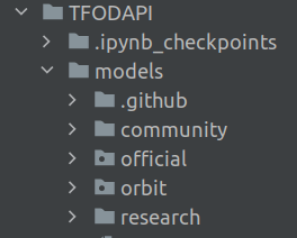

Now create a new folder under TFODAPI and call it workspace. It is within the workspace that we will store all our training set-ups. Now let’s go under workspace and create another folder named training_pothole. 

The training_pothole folder shall be our training folder, which will contain all files related to our model training. It is advisable to create a separate training folder each time we wish to train on a different dataset. The typical structure for training folders is shown below.Now our directory structure should be as follows

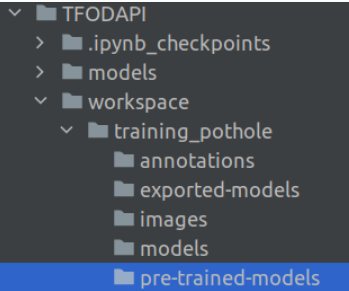

Let us elaborate on the different folders under the training folder.

Here’s an explanation for each of the folders/filer shown in the above tree:

**annotations:** This folder will be used to store all *.csv files and the respective TensorFlow *.record files, which contain the list of annotations for our dataset images.

**exported-models:** This folder will be used to store exported versions of our trained model(s).

**images:** This folder contains a copy of all the images in our dataset.

**images/train:** This folder contains a copy of all images which will be used to train our model.

**images/test:** This folder contains a copy of all images which will be used to test our model.

**models:** This folder will contain a sub-folder for each of training job. Each subfolder will contain the training pipeline configuration file *.config, as well as all files generated during the training and evaluation of our model.

**pre-trained-models:** This folder will contain the downloaded pre-trained models, which shall be used as a starting checkpoint for our training jobs.

#### Process 2

The next process is to take our annotated images and the split it into train and test sets. We will utilise the annotated images we created in Post 2 of our series. We will also be utilising the annotation csv file which we created where we stored all the bounding box details.

Let us first get the folder where the raw annotated images are kept. We will split the set of files into train and test sets and then move the files into the train and test folders we have created.

Let us list down all the images we have in our 'data' folder. Now please note that if you do not have the 'data' folder in the place your notebook is setup, you need to give the path to the folder where the data is placed

In [2]:
pwd

'/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/TFODAPI'

In [3]:
# List down all the annotated images
random.seed(123)
# Initialise the folder where the annotated images are placed
datafolder = '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages'
# List down all the images in the data folder
images = glob.glob(datafolder + '/*.jpeg')
print(len(images))
images

18


['/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole1.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole10.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole11.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole12.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole13.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole14.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole15.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole16.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/BayesianQuest/Pothole/data/annotatedImages/pothole17.jpeg',
 '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/B

In [4]:
# Let us sort the images and the split it into train and test sets
images.sort()

# Split the dataset into train-valid-test splits 
train_images, test_images = train_test_split(images,test_size = 0.1, random_state = 123)

print('Total train images :',len(train_images))
print('Total test images:',len(test_images))

Total train images : 16
Total test images: 2


Next we will create two folders under the 'images' folder to store test and train images. After that we will move the train and test images from the current folder to the new folders wer have created

In [ ]:
# Creating the train and test folders inside the workspace images folder
!mkdir workspace/training_pothole/images/train workspace/training_pothole/images/test

In [5]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

In [ ]:
# Move the splits into their folders
move_files_to_folder(train_images, 'workspace/training_pothole/images/train')
move_files_to_folder(test_images, 'workspace/training_pothole/images/test/')

In [6]:
# Let us list some of the files in those folders

print('Train Images',glob.glob('workspace/training_pothole/images/train'+ '/*.jpeg'))

print('Test Images',glob.glob('workspace/training_pothole/images/test'+ '/*.jpeg'))

Train Images ['workspace/training_pothole/images/train/pothole1.jpeg', 'workspace/training_pothole/images/train/pothole10.jpeg', 'workspace/training_pothole/images/train/pothole11.jpeg', 'workspace/training_pothole/images/train/pothole12.jpeg', 'workspace/training_pothole/images/train/pothole14.jpeg', 'workspace/training_pothole/images/train/pothole15.jpeg', 'workspace/training_pothole/images/train/pothole16.jpeg', 'workspace/training_pothole/images/train/pothole17.jpeg', 'workspace/training_pothole/images/train/pothole18.jpeg', 'workspace/training_pothole/images/train/pothole2.jpeg', 'workspace/training_pothole/images/train/pothole4.jpeg', 'workspace/training_pothole/images/train/pothole5.jpeg', 'workspace/training_pothole/images/train/pothole6.jpeg', 'workspace/training_pothole/images/train/pothole7.jpeg', 'workspace/training_pothole/images/train/pothole8.jpeg', 'workspace/training_pothole/images/train/pothole9.jpeg']
Test Images ['workspace/training_pothole/images/test/pothole13.jpe

In [15]:
'workspace/training_pothole/images/train/pothole1.jpeg'.split("/")

['workspace', 'training_pothole', 'images', 'train', 'pothole1.jpeg']

#### Process 3

Creating the class maps

Next we will create the class maps which are required for the training process



In [8]:
# Reading the csv file
pothole_df = pd.read_csv('../pothole_df.csv')
pothole_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,pothole1.jpeg,275,183,pothole,64,78,130,107
1,pothole1.jpeg,275,183,pothole,44,105,131,154
2,pothole1.jpeg,275,183,pothole,12,151,59,177
3,pothole1.jpeg,275,183,vegetation,163,33,254,58
4,pothole1.jpeg,275,183,pothole,115,54,142,74


In [9]:
pothole_df['class'].unique()

array(['pothole', 'vegetation', 'sign', 'vehicle'], dtype=object)

Next we need to open an editor, name it label_map.pbtxt and the include the below mapping in that file. THe below file is a requirement for creating the label objects. This has to be placed in the folder 'annotation' which we created earlier

In [ ]:
item {
    id: 1
    name: 'pothole'
}

item {
    id: 2
    name: 'vegetation'
}

item {
    id: 3
    name: 'sign'
}

item {
    id: 4
    name: 'vehicle'
}

### Downloading the pretrained models

We will not be training the model from scratch, rather we would be fine tuning a pre-trained model for our purpose. The pre-trained model we will be using would be SSD ResNet50 V1 FPN 640x640. These pre-trained models are available in TensorFlow 2 Detection Model Zoo. Later on I would encourage you to implement the same detector using a Faster RCNN model from this repository.

We start our training process by downloading the model we want to implement from the TensorFlow 2 Detection Model Zoo.

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

Once we click on the link, a .tar.gz file gets downloaded to your local drive. Extract the contents of the tar file and then move the complete folder into the folder pre-trained-models. Since we extracted the model SSD ResNet50 V1 FPN 640x640, our folder, pre-trained-models will have the following structure.

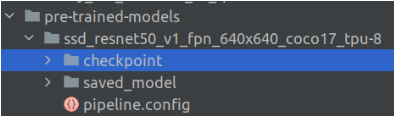

After unloading the contents of the model to the pre-trained models folder, we will now create a new folder under the folder workspace/training_pothole/models and name it my_ssd_resnet50_v1_fpn and then copy the pipeline.config file from the folder pre-trained-models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8 and place it in the new folder my_ssd_resnet50_v1_fpn you created. Now the structure will look like the below.


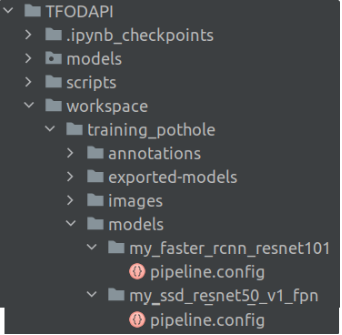

### Changes to the config file

Change 1 : The first change we have to make is in line 3 for the number of classes. We need to change the number of classes to 4


Change 2 : The next change is in line 131 for the batch size. Depending on the number of examples, you need to change the batch size.


Change 3 : The next optional change is for the number of training steps as in line 152 and 154. Depending on the configuration of your machine you can change it to the number of steps you want to train the model.


Change 4 : Path to the check point of the pre-trained model in line 161

Change 5 : Change the fine tune checkpoint type to “detection” from the default “classification'” in line 167

Change 6 : label_map_path and train record paths , line 172 and 174

Change 7: label_map_path and test record paths, line 182 and 186

### Training the model

We have a script which is part of the API files to do the training. This can be copied from the folder TFODAPI/models/research/object_detection/model_main_tf2.py. This needs to be placed in the training_pothole folder as shown

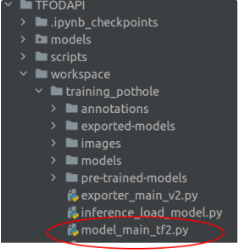

### Exporting the best model

We now need to export the trained models for the inference process. This means that the model object is exported from the latest checkpoint to a new folder from which we will do our predictions.

To get this done, we first need to copy the file, TFODAPI/models/research/object_detection/exporter_main_v2.py and then paste it inside the training_pothole folder.

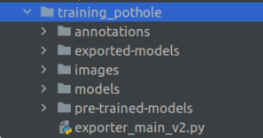

In [ ]:
# Exporting the model
# Please change the relevant path to reflect the path of your files

python exporter_main_v2.py --input_type image_tensor --pipeline_config_path models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir models/my_ssd_resnet50_v1_fpn/ --output_directory exported-models/my_model

You will now see the model object and the checkpoint information in the exported-models/my_model folder.

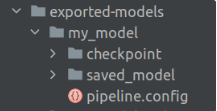